### Classification problem

Type of problem where the output variables are discreate variables or classes. It is not continuous variable like the linear regression 
    .Example, classifying email as spam or not spam. Given a size of tumour, classify as malignant or Bengine. We can plat the out put with markers. Say "X" for positive and "O" for negative outputs.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_train = np.array([1,2,3,4,5])
y_train = np.array([0,0,0,1,1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

In [9]:
## Get index of positive
pos = y_train == 1
print(pos)
print(x_train == pos)
neg = y_train == 0
print(neg)

[False False False  True  True]
[False False False False False]
[ True  True  True False False]


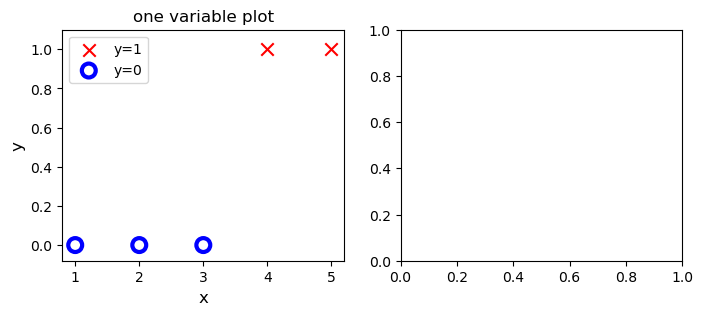

In [11]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors="blue",lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()



#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

### Linear regression for classification problems
If we attempt to solve the problem using linear regression, we would get a line with some slope to predict the output. If a new data is added with higher value of x and y=1 (x-20, y=1), then complete regression model will fails to predict.


Regression is for continuous values of output. Classification is for discrete outputs.

## Logistic function

As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

In [19]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [20]:
x = np.array([1,2,3])
print(sigmoid(x))

[0.73105858 0.88079708 0.95257413]


### Plotting sigmoid values for -10 to 11 

Text(0, 0.5, 'Value of Z')

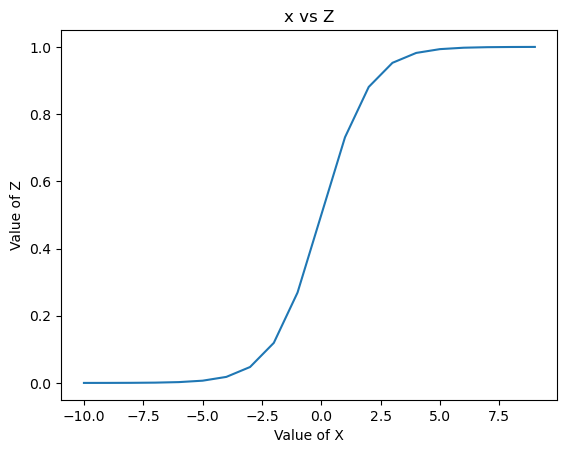

In [22]:
x_z = np.arange(-10,10)

plt.plot(x_z, sigmoid(x_z))
plt.title("x vs Z")
plt.xlabel("Value of X")
plt.ylabel("Value of Z")



### Logistic regression model function

A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$
